#  Project Title: SupplyChainLogix – Supply Chain Data Insights and Optimization

**Context:**
A growing e-commerce company is facing operational inefficiencies across its multi-warehouse supply chain network. The company has hired the Data Science team to analyze supply chain data, uncover hidden patterns, and offer data-backed recommendations to optimize performance, reduce delays, and improve customer satisfaction.


**Objective:**
To use data science methodologies to analyze warehouse, order, and delivery data to:

Identify delays and inefficiencies in the delivery process.

Evaluate warehouse and carrier performance.

Detect high-risk stock-out products and regions with elevated return rates.

Provide actionable strategies for optimizing operations and logistics



**Dataset Overview:**


The dataset contains the following key features:

Dataset from January to December 2025.

Order & Fulfillment: order_id, customer_id, warehouse_id, product_id

Dates & Timing: order_date, shipment_date, delivery_date, processing_time, delivery_time, total_time

Cost: order_cost, delivery_cost, commission

Logistics: carrier, region, status (Delivered, Delayed, Canceled)

Inventory & Returns: inventory_level, stock_out_flag, return_flag

### 4.1 Sanity Checks

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
df = pd.read_csv('Supply_chain.csv')
df.head()

,order_id,customer_id,warehouse_id,product_id,order_date,shipment_date,delivery_date,processing_time,delivery_time,total_time,carrier,region,order_cost,delivery_cost,status,inventory_level,stock_out_flag,return_flag
0,1366,20647,WH1,143,1/1/2024,1/3/2024,1/5/2024,2,2,4,UPS,East,100.54,18.71,Delivered,37,False,False
1,1367,18716,WH1,157,1/2/2024,1/5/2024,1/9/2024,3,4,7,UPS,East,186.37,20.01,Delivered,32,False,False
2,1368,98891,WH3,102,1/3/2024,1/6/2024,1/9/2024,3,3,6,DHL,South,101.76,43.27,Delivered,41,False,False
3,1369,97545,WH3,185,1/4/2024,1/5/2024,1/8/2024,1,3,4,FedEx,East,185.99,28.53,Delayed,60,False,False
4,1370,99912,WH1,169,1/5/2024,1/6/2024,1/8/2024,1,2,3,FedEx,South,107.90,29.47,Delivered,45,False,False


In [3]:
df2=df.copy()

In [4]:
df.shape

(366, 18)

The dataset has 1000 rows and 18 columns.

In [5]:
#Searching for duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
#Searching null values
df.isnull().sum()

,0
order_id,0
customer_id,0
warehouse_id,0
product_id,0
order_date,0
shipment_date,0
delivery_date,0
processing_time,0
delivery_time,0
total_time,0


In [7]:
#get info from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         366 non-null    int64  
 1   customer_id      366 non-null    int64  
 2   warehouse_id     366 non-null    object 
 3   product_id       366 non-null    int64  
 4   order_date       366 non-null    object 
 5   shipment_date    366 non-null    object 
 6   delivery_date    366 non-null    object 
 7   processing_time  366 non-null    int64  
 8   delivery_time    366 non-null    int64  
 9   total_time       366 non-null    int64  
 10  carrier          366 non-null    object 
 11  region           366 non-null    object 
 12  order_cost       366 non-null    float64
 13  delivery_cost    366 non-null    float64
 14  status           366 non-null    object 
 15  inventory_level  366 non-null    int64  
 16  stock_out_flag   366 non-null    bool   
 17  return_flag     

 order_date        object
 shipment_date     object
 delivery_date     object

Need to be updated to date time

In [8]:
 # convert to date time order_date
 df['order_date']= pd.to_datetime(df['order_date'])

In [9]:
#convert delivery_date  to datetime
df['delivery_date']= pd.to_datetime(df['delivery_date'])


In [10]:
#shipment_date to datetime
df['shipment_date']= pd.to_datetime(df['shipment_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         366 non-null    int64         
 1   customer_id      366 non-null    int64         
 2   warehouse_id     366 non-null    object        
 3   product_id       366 non-null    int64         
 4   order_date       366 non-null    datetime64[ns]
 5   shipment_date    366 non-null    datetime64[ns]
 6   delivery_date    366 non-null    datetime64[ns]
 7   processing_time  366 non-null    int64         
 8   delivery_time    366 non-null    int64         
 9   total_time       366 non-null    int64         
 10  carrier          366 non-null    object        
 11  region           366 non-null    object        
 12  order_cost       366 non-null    float64       
 13  delivery_cost    366 non-null    float64       
 14  status           366 non-null    object   

In [12]:
#Extrac year from columm order date
df['year']=df['order_date'].dt.year
df.head()

,order_id,customer_id,warehouse_id,product_id,order_date,shipment_date,delivery_date,processing_time,delivery_time,total_time,carrier,region,order_cost,delivery_cost,status,inventory_level,stock_out_flag,return_flag,year
0,1366,20647,WH1,143,2024-01-01,2024-01-03,2024-01-05,2,2,4,UPS,East,100.54,18.71,Delivered,37,False,False,2024
1,1367,18716,WH1,157,2024-01-02,2024-01-05,2024-01-09,3,4,7,UPS,East,186.37,20.01,Delivered,32,False,False,2024
2,1368,98891,WH3,102,2024-01-03,2024-01-06,2024-01-09,3,3,6,DHL,South,101.76,43.27,Delivered,41,False,False,2024
3,1369,97545,WH3,185,2024-01-04,2024-01-05,2024-01-08,1,3,4,FedEx,East,185.99,28.53,Delayed,60,False,False,2024
4,1370,99912,WH1,169,2024-01-05,2024-01-06,2024-01-08,1,2,3,FedEx,South,107.90,29.47,Delivered,45,False,False,2024


In [13]:
#check unique year
df['year'].unique()

array([2024], dtype=int32)

In [14]:
#Verify how many warehouses exist
df['warehouse_id'].nunique()

3

In [15]:
df['warehouse_id'].value_counts()

,count
warehouse_id,
WH1,130
WH3,121
WH2,115


In [16]:
df['customer_id'].nunique()

365

In [17]:
df['product_id'].nunique()

94

In [18]:
df['carrier'].nunique()

3

In [19]:
#Verifying how many carriers the company has.
df['carrier'].value_counts()

,count
carrier,
DHL,126
FedEx,122
UPS,118


- The company has three carriers UPS, FedEx and DHL.

In [20]:
#Verifiying the status
df['status'].value_counts()

,count
status,
Delivered,262
Delayed,87
Canceled,17


- There are 3 differents status Delivere, Delayed and Canceled.

In [21]:
#STATISTICS
df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_id,366.0,1548.5,1366.0,1457.25,1548.5,1639.75,1731.0,105.799338
customer_id,366.0,55253.333333,10384.0,31699.75,55128.0,77930.5,99930.0,26616.087901
product_id,366.0,146.945355,100.0,120.0,145.0,174.75,199.0,29.981862
order_date,366,2024-07-01 12:00:00.000000256,2024-01-01 00:00:00,2024-04-01 06:00:00,2024-07-01 12:00:00,2024-09-30 18:00:00,2024-12-31 00:00:00,NaN
shipment_date,366,2024-07-03 11:32:27.540983552,2024-01-03 00:00:00,2024-04-03 06:00:00,2024-07-03 00:00:00,2024-10-02 18:00:00,2025-01-03 00:00:00,NaN
delivery_date,366,2024-07-06 11:12:47.213114624,2024-01-05 00:00:00,2024-04-06 06:00:00,2024-07-06 12:00:00,2024-10-06 18:00:00,2025-01-06 00:00:00,NaN
processing_time,366.0,1.980874,1.0,1.0,2.0,3.0,3.0,0.848635
delivery_time,366.0,2.986339,2.0,2.0,3.0,4.0,4.0,0.822512
total_time,366.0,4.967213,3.0,4.0,5.0,6.0,7.0,1.18623
order_cost,366.0,171.485792,50.96,114.1675,169.575,231.61,299.38,69.24676


In [22]:
#Splitting the numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [23]:
#Removing order_id column from numerical columns
numerical_columns = numerical_columns.drop('order_id')

In [24]:
#Verifying negative numbers in numerical columns
for column in numerical_columns:
    negative_count = (df[column] < 0).sum()
    print(f"Number of negative values in {column}: {negative_count}")

Number of negative values in customer_id: 0
Number of negative values in product_id: 0
Number of negative values in processing_time: 0
Number of negative values in delivery_time: 0
Number of negative values in total_time: 0
Number of negative values in order_cost: 0
Number of negative values in delivery_cost: 0
Number of negative values in inventory_level: 0


### 4.2 Univariate Analysis

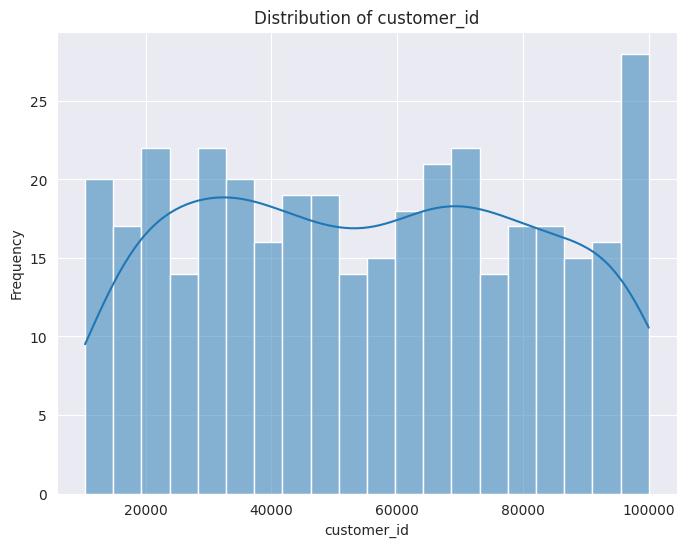

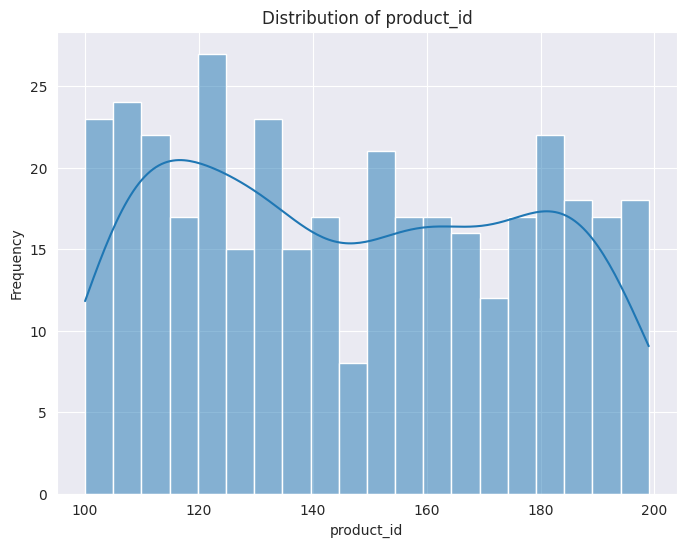

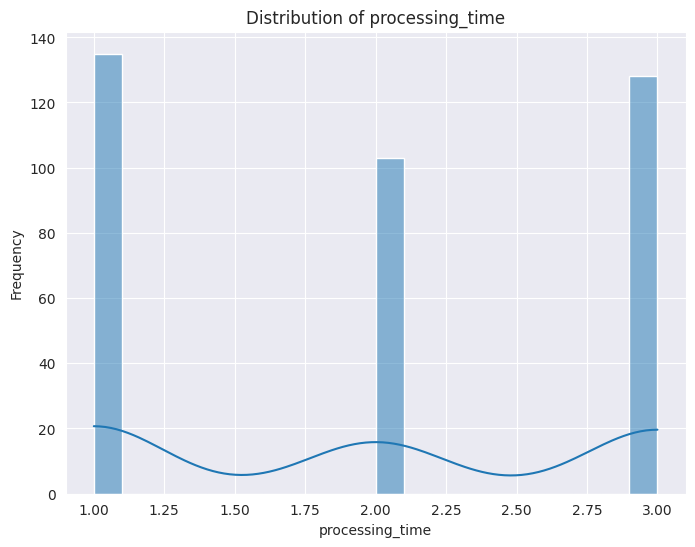

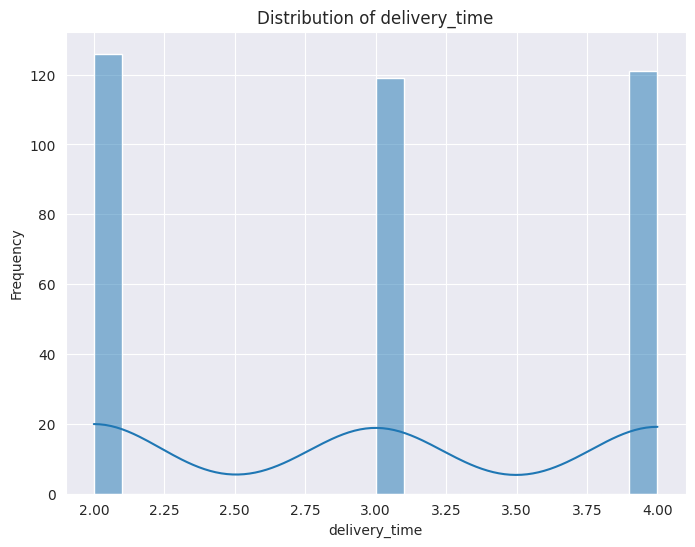

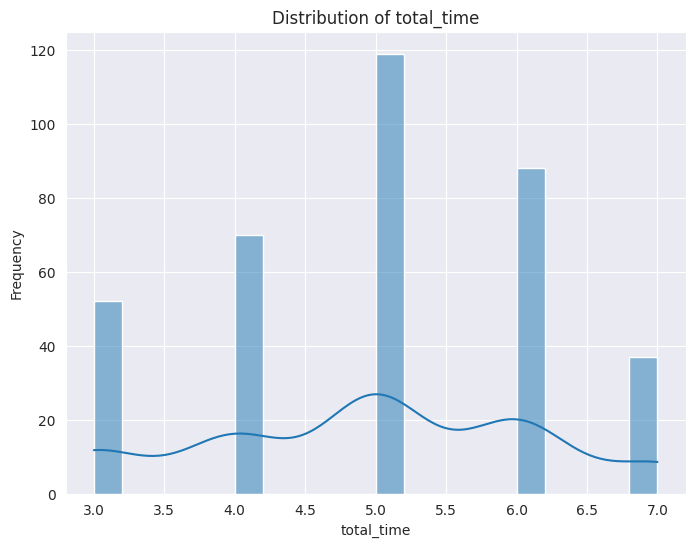

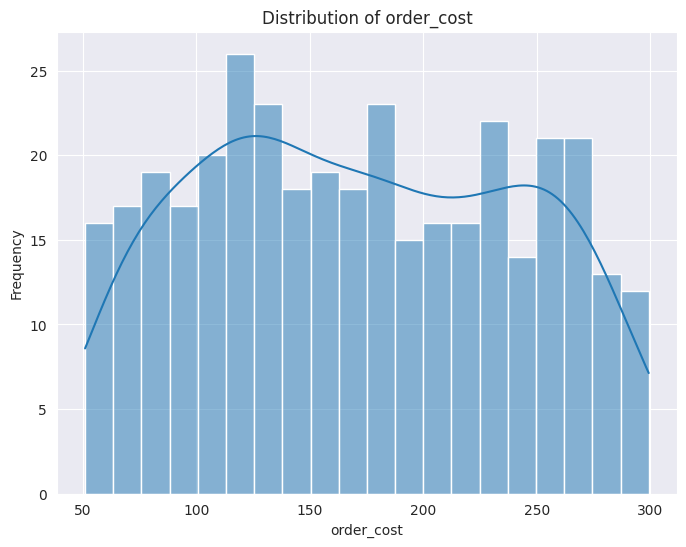

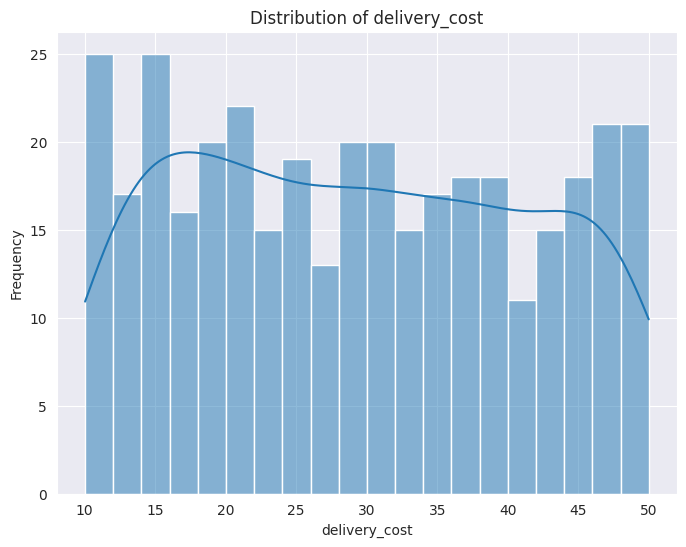

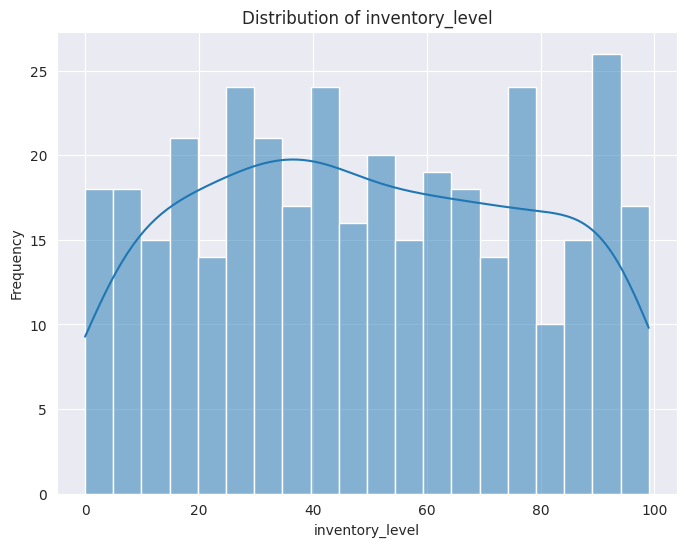

In [25]:
#style darkgrid
sns.set_style('darkgrid')

#performing univariate analysis for numerical columns with

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')



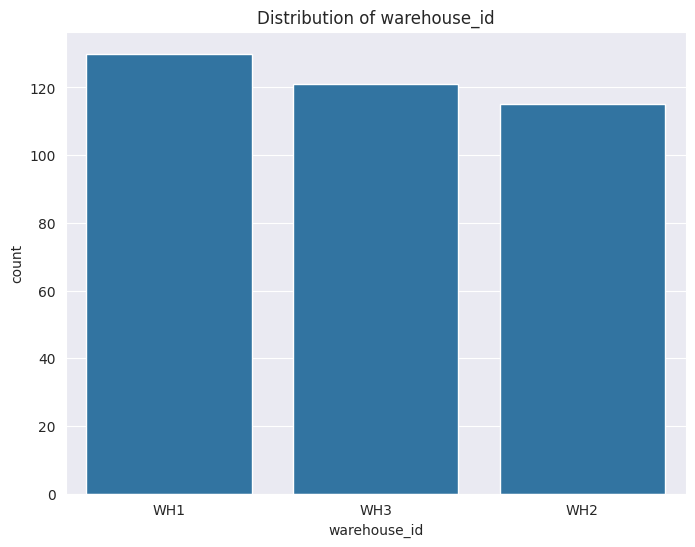

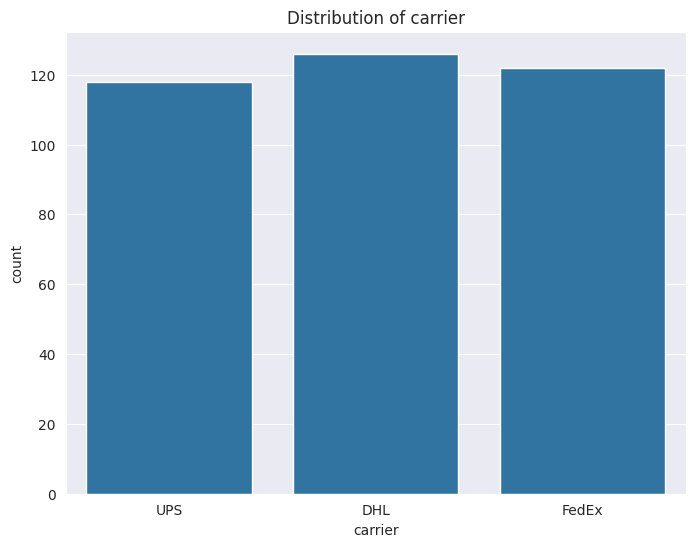

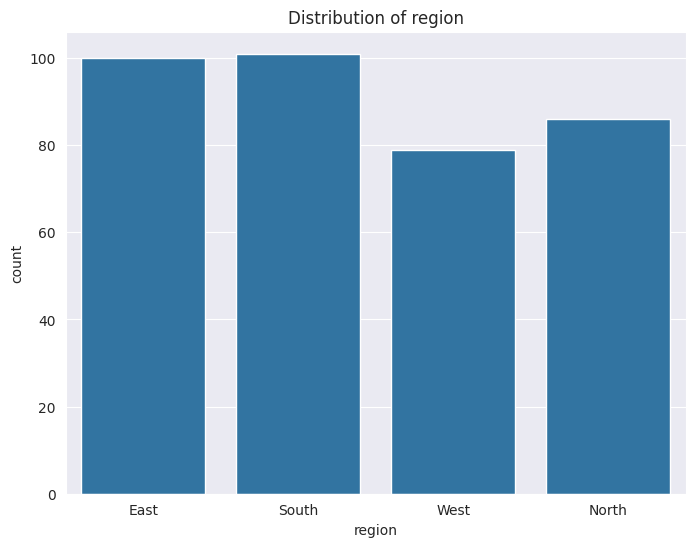

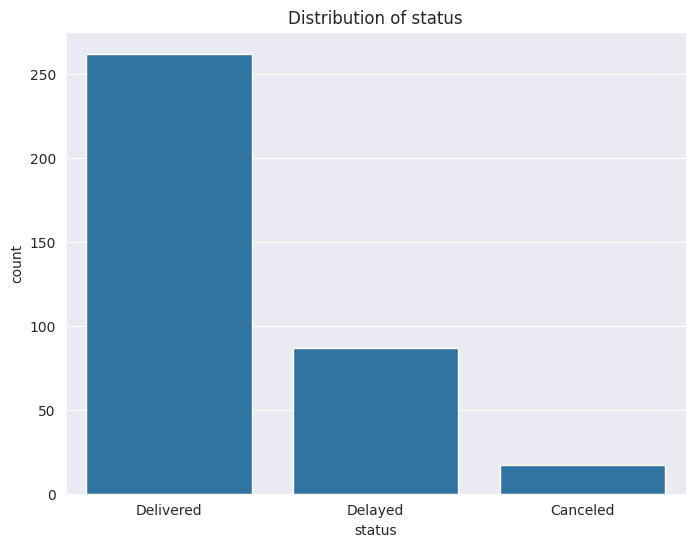

In [26]:
##performing univariate analysis for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

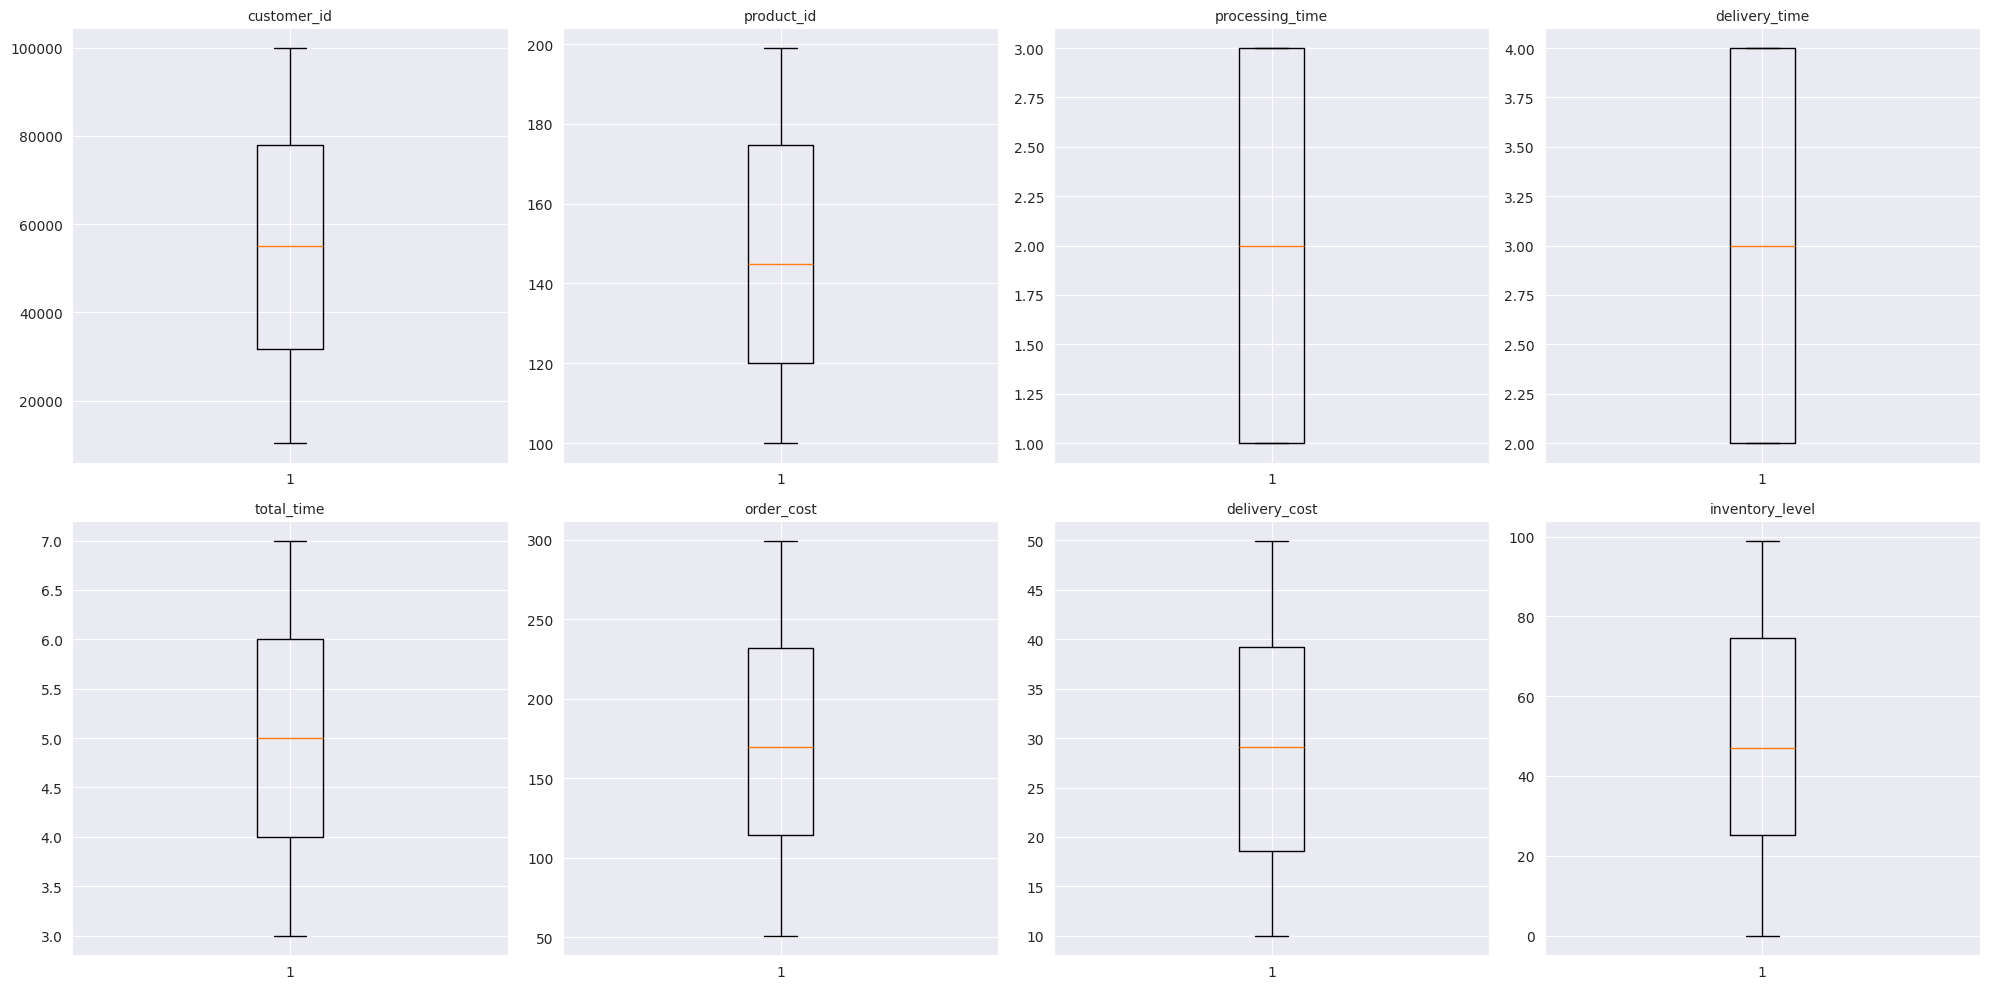

In [27]:
#Detection of oultiers in numerical columns with 2 rows and 4 colums

# Set the figure size
plt.figure(figsize=(20, 10))  # Adjust width and height as needed

# Loop through numeric columns
for i, variable in enumerate(numerical_columns, 1):  # Start counting at 1 directly
    plt.subplot(2, 4, i)  # 2 rows, 4 columns
    plt.boxplot(df[variable], whis=1.5)
    plt.title(variable, fontsize=10)
    plt.tight_layout()

plt.show()

### 4.3 Bivariate Analysis

#### 1. Identify Delays and Inefficiencies in the Delivery Process

In [28]:
df.head()

,order_id,customer_id,warehouse_id,product_id,order_date,shipment_date,delivery_date,processing_time,delivery_time,total_time,carrier,region,order_cost,delivery_cost,status,inventory_level,stock_out_flag,return_flag,year
0,1366,20647,WH1,143,2024-01-01,2024-01-03,2024-01-05,2,2,4,UPS,East,100.54,18.71,Delivered,37,False,False,2024
1,1367,18716,WH1,157,2024-01-02,2024-01-05,2024-01-09,3,4,7,UPS,East,186.37,20.01,Delivered,32,False,False,2024
2,1368,98891,WH3,102,2024-01-03,2024-01-06,2024-01-09,3,3,6,DHL,South,101.76,43.27,Delivered,41,False,False,2024
3,1369,97545,WH3,185,2024-01-04,2024-01-05,2024-01-08,1,3,4,FedEx,East,185.99,28.53,Delayed,60,False,False,2024
4,1370,99912,WH1,169,2024-01-05,2024-01-06,2024-01-08,1,2,3,FedEx,South,107.90,29.47,Delivered,45,False,False,2024


In [29]:
#Finding the status rate
df['status'].value_counts(normalize=True)

,proportion
status,
Delivered,0.715847
Delayed,0.237705
Canceled,0.046448


In [30]:
#pivot table status by warehouse
pd.pivot_table(df, index='carrier', columns='status', values='order_id', aggfunc='count',margins=True)

status,Canceled,Delayed,Delivered,All
carrier,,,,
DHL,6,32,88,126
FedEx,6,29,87,122
UPS,5,26,87,118
All,17,87,262,366


In [31]:
#groupping carrier and status value counts normalize true rounded 2 decimals
df.groupby('carrier')['status'].value_counts(normalize=True).round(2)


carrier  status   
DHL      Delivered    0.70
         Delayed      0.25
         Canceled     0.05
FedEx    Delivered    0.71
         Delayed      0.24
         Canceled     0.05
UPS      Delivered    0.74
         Delayed      0.22
         Canceled     0.04
Name: proportion, dtype: float64

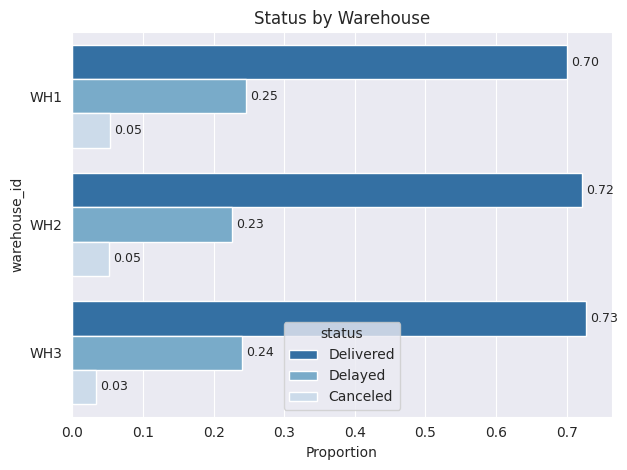

In [32]:
ax = sns.barplot(
    data=df.groupby('warehouse_id')['status']
            .value_counts(normalize=True)
            .rename('Proportion')
            .reset_index(),
    x='Proportion',
    y='warehouse_id',
    hue='status',
    orient='h',
    palette='Blues_r'
)

# Add clean labels with 2 decimal places and center them
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v.get_width():.2f}' for v in container],
        label_type='edge',
        padding=3,
        fontsize=9
    )

plt.title('Status by Warehouse')
plt.tight_layout()
plt.show()


In [33]:
#groupping carrier by status and warehouse id value counts normalize true rounded 2 decimals
df.groupby(['warehouse_id','carrier'])['status'].value_counts(normalize=True).round(2)

warehouse_id  carrier  status   
WH1           DHL      Delivered    0.65
                       Delayed      0.28
                       Canceled     0.08
              FedEx    Delivered    0.68
                       Delayed      0.26
                       Canceled     0.06
              UPS      Delivered    0.78
                       Delayed      0.20
                       Canceled     0.02
WH2           DHL      Delivered    0.64
                       Delayed      0.32
                       Canceled     0.05
              FedEx    Delivered    0.83
                       Delayed      0.14
                       Canceled     0.03
              UPS      Delivered    0.72
                       Delayed      0.19
                       Canceled     0.08
WH3           DHL      Delivered    0.81
                       Delayed      0.17
                       Canceled     0.02
              FedEx    Delivered    0.65
                       Delayed      0.30
                       Canceled     0.05
              UPS      Delivered    0.71
                       Delayed      0.26
                       Canceled     0.02
Name: proportion, dtype: float64

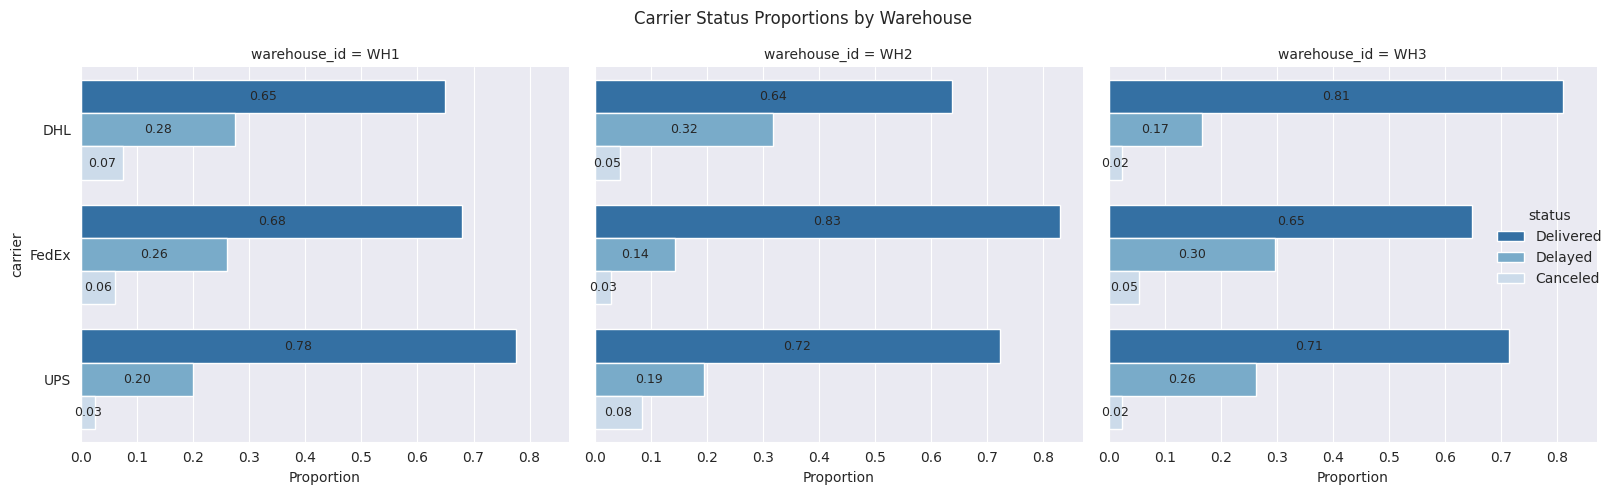

In [34]:


# Prepare the data
carrier_warehouse_status = (
    df.groupby(['warehouse_id', 'carrier'])['status']
    .value_counts(normalize=True)
    .rename('Proportion')
    .reset_index()
)

# Plot using FacetGrid
g = sns.catplot(
    data=carrier_warehouse_status,
    x='Proportion',
    y='carrier',
    hue='status',
    col='warehouse_id',       # Facet by warehouse
    kind='bar',
    orient='h',
    palette='Blues_r',
    height=5,
    aspect=1
)

# Add bar labels
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{b.get_width():.2f}' for b in container], label_type='center', fontsize=9)

# Adjust and show
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Carrier Status Proportions by Warehouse')
plt.tight_layout()
plt.show()


Observations Status by Warehouse:

🏬 WH1:
Delivered: 70%

Delayed: 25%

Canceled: 5%

🏬 WH2:
Delivered: 72% (best performance)

Delayed: 23%

Canceled: 5%

🏬 WH3:
Delivered: 73% (highest among all)

Delayed: 24%

Canceled: 3% (lowest cancellation rate)

All warehouses show similar performace, but WH3 slightly outperforms in delivery rate and has lowest cancellation rate.

Observations: Carrier Status by Warehouse

WH1:
 - Best UPS   (Delivered: 78%, Delayed: 20%, Canceled: 2%)
 - Worst DHL  (Delivered: 65%, Delayed: 28%, Canceled: 7%)
WH2 :
 - Best FedEx (Delivered: 83%, Delayed: 14%, Canceled: 3%)
 - Worst DHL  (Delivered: 64%, Delayed: 32%, Canceled: 5%)

WH3
 - Best DHL    (Delivered: 81%, Delayed: 17%, Canceled: 2%)
 - Worst FedEx (Delivered: 65%, Delayed: 30%, Canceled: 5%)



DHL is inconsistent, being the worst in WH1 and WH2, but the best in WH3.
FedEx excels in WH2, but unperforms in WH3.
UPS is reliable in WH1, with steady performance in other warehouses.

#### 2. Detect High-Risk Stock-Out Products and Return Hotspots

In [35]:
df.head()

,order_id,customer_id,warehouse_id,product_id,order_date,shipment_date,delivery_date,processing_time,delivery_time,total_time,carrier,region,order_cost,delivery_cost,status,inventory_level,stock_out_flag,return_flag,year
0,1366,20647,WH1,143,2024-01-01,2024-01-03,2024-01-05,2,2,4,UPS,East,100.54,18.71,Delivered,37,False,False,2024
1,1367,18716,WH1,157,2024-01-02,2024-01-05,2024-01-09,3,4,7,UPS,East,186.37,20.01,Delivered,32,False,False,2024
2,1368,98891,WH3,102,2024-01-03,2024-01-06,2024-01-09,3,3,6,DHL,South,101.76,43.27,Delivered,41,False,False,2024
3,1369,97545,WH3,185,2024-01-04,2024-01-05,2024-01-08,1,3,4,FedEx,East,185.99,28.53,Delayed,60,False,False,2024
4,1370,99912,WH1,169,2024-01-05,2024-01-06,2024-01-08,1,2,3,FedEx,South,107.90,29.47,Delivered,45,False,False,2024


In [36]:
#Get the montly stock out
monthly_stockout = (
    df[df['stock_out_flag'] == True]
    .set_index('order_date')
    .resample('M')   # Resample by Month
    .size()
    .reset_index(name='stockout_count')
)


<ipython-input-36-420c03a27ffc>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')   # Resample by Month


In [37]:
monthly_stockout.head()

,order_date,stockout_count
0,2024-02-29,3
1,2024-03-31,3
2,2024-04-30,1
3,2024-05-31,5
4,2024-06-30,5


In [38]:
#sum the total stock out of montly stock out
monthly_stockout['stockout_count'].sum()

np.int64(36)

In [39]:
#count order_date
df['order_date'].count()

np.int64(366)

In [40]:
#proportion of stock out over the total order
monthly_stockout['stockout_count'].sum() / df['order_date'].count()

np.float64(0.09836065573770492)

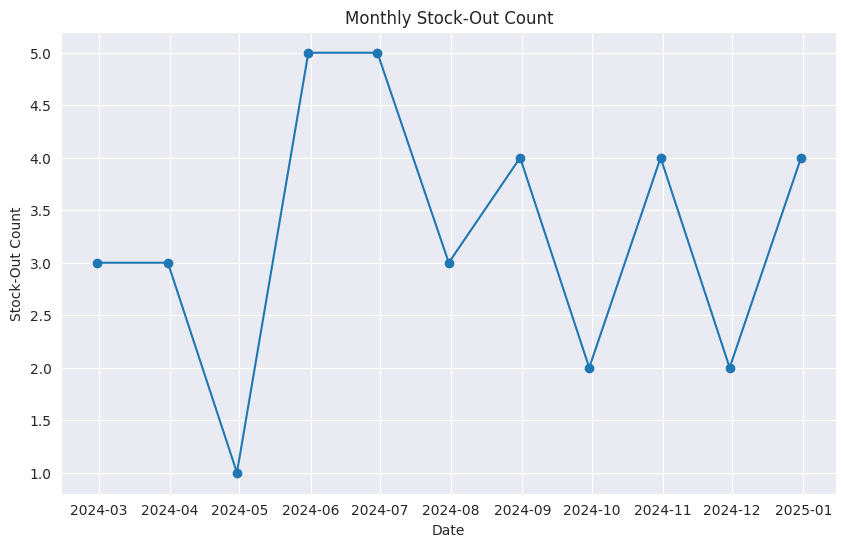

In [41]:
#plotting monthly stockout
plt.figure(figsize=(10, 6))
plt.plot(monthly_stockout['order_date'], monthly_stockout['stockout_count'], marker='o', linestyle='-')
plt.title('Monthly Stock-Out Count')
plt.xlabel('Date')
plt.ylabel('Stock-Out Count')
plt.grid(True)
plt.show()

Observations:
  * Stock outs occur consistently across months with notable spikes points in June and July 2024.
  *  Recent peak suggestion potencial issue ( August- September 2025)
  

In [42]:
#Get mean stouck outs rounded 2 decimals
print(df[df['warehouse_id']=='WH1']['stock_out_flag'].sum())
print(df[df['warehouse_id']=='WH2']['stock_out_flag'].sum())
print(df[df['warehouse_id']=='WH3']['stock_out_flag'].sum())

14
11
11


In [43]:

stockout_rate = (
    df[df['stock_out_flag'] == True]
    .groupby('warehouse_id')['stock_out_flag']
    .count()
    .round(2)
    .reset_index(name='stockout_rate')
)

stockout_rate

,warehouse_id,stockout_rate
0,WH1,14
1,WH2,11
2,WH3,11


Observations:

  * Warehouse WH2 has the higher average stock out compare to WH1 and WH3.(1.57)
  * WH1 and WH3 have similar average for stock out with 1.44 approximatly days.
   

<ipython-input-44-c6f31a44084e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stockout_prop, x='stock_out_flag', y='proportion', palette='Blues_r', ax=axes[0])
<ipython-input-44-c6f31a44084e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stockout_rate, x='stockout_rate', y='warehouse_id', palette='Blues_r', ax=axes[1])


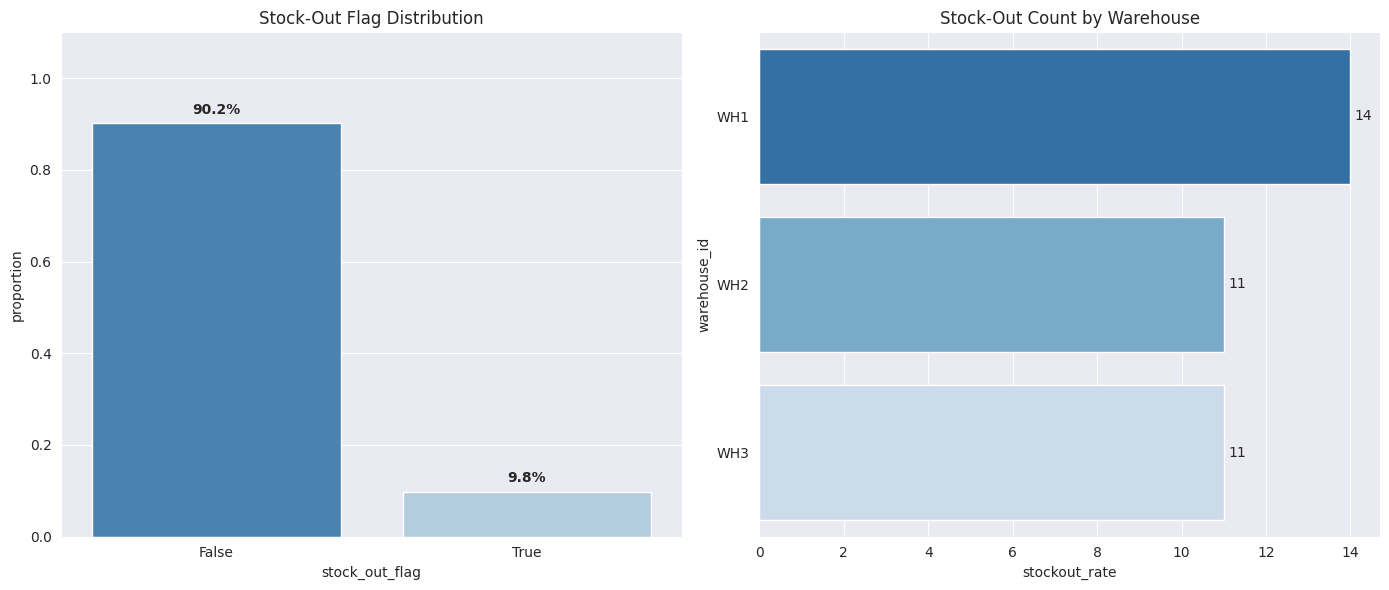

In [44]:
# Prepare data
stockout_prop = df['stock_out_flag'].value_counts(normalize=True).round(3).reset_index()
stockout_prop.columns = ['stock_out_flag', 'proportion']

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Stock-Out Flag Distribution
sns.barplot(data=stockout_prop, x='stock_out_flag', y='proportion', palette='Blues_r', ax=axes[0])
axes[0].set_title("Stock-Out Flag Distribution")
axes[0].set_ylim(0, 1.1)

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width()/2, p.get_height() + 0.02),
                     ha='center', fontsize=10, fontweight='bold')

# Plot 2: Stock-Out Count by Warehouse
sns.barplot(data=stockout_rate, x='stockout_rate', y='warehouse_id', palette='Blues_r', ax=axes[1])
axes[1].set_title("Stock-Out Count by Warehouse")

for c in axes[1].containers:
    axes[1].bar_label(c, label_type='edge', padding=3)

plt.tight_layout()
plt.show()


In [45]:
df['stock_out_flag'].value_counts()

,count
stock_out_flag,
False,330
True,36


Observations:

* Overal Stock out Rate: a Total of 336 orders were received, 90.2% were available and 9.8% were reported as stock_out.

* WH1 Expereinced the highest number of stock out with 14 orders.
* WH1 and WH2 each had 11 stock outs, reflecting balanced performance.

*Trends: Peaks occurred in June and July, suggesting a possible seasonal or supply chain inefficiencies during mid year.


Recommendations:

Investigate operational or demand factors led to the spike in stock outs.

Continuous monitoring and proactive restocking strategies should be implemented to reduce the % below 5% moving forward.


In [46]:
# Sort the regions if needed (optional to control order)
# First: Aggregate the counts
warehouse_stockout_counts = df[df['stock_out_flag'] == True]['warehouse_id'].value_counts().reset_index()
warehouse_stockout_counts.columns = ['warehouse_id', 'count']


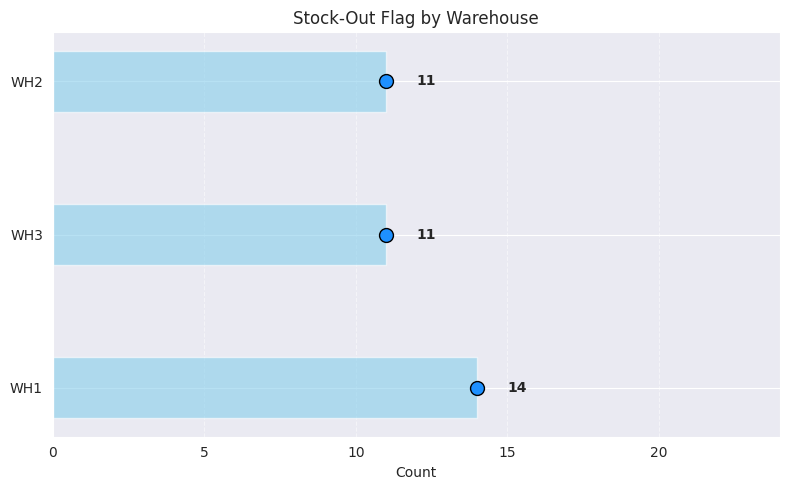

In [47]:
plt.figure(figsize=(8, 5))

# Horizontal bars and dots
counts = warehouse_stockout_counts['count']
labels = warehouse_stockout_counts['warehouse_id']

plt.barh(labels, counts, color='skyblue', height=0.4, alpha=0.6)
plt.scatter(counts, labels, color='dodgerblue', s=100, edgecolors='black', linewidth=1)

# Add count labels
for val, name in zip(counts, labels):
    plt.text(val + 1, name, str(val), va='center', ha='left', fontsize=10, fontweight='bold')

# Final touches
plt.xlabel('Count')
plt.title('Stock-Out Flag by Warehouse')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlim(0, counts.max() + 10)
plt.tight_layout()
plt.show()


In [48]:
#top 5 stock out by product id
top_stockout_products = (
    df[df['stock_out_flag'] == True]
    .groupby(['warehouse_id','product_id'])
    .size()
    .reset_index(name='stockout_count')
    .sort_values('stockout_count', ascending=False)
    .head(5)
)
top_stockout_products

,warehouse_id,product_id,stockout_count
27,WH3,120,3
0,WH1,102,1
1,WH1,105,1
2,WH1,110,1
4,WH1,116,1


In [49]:
df['product_id'].nunique()

94

In [50]:
#print product id that out of stock is > 3
df[df['stock_out_flag'] == True][['product_id','warehouse_id']].value_counts()

product_id  warehouse_id
120         WH3             3
101         WH2             1
            WH3             1
102         WH1             1
107         WH2             1
105         WH1             1
110         WH3             1
115         WH1             1
            WH2             1
110         WH1             1
116         WH1             1
120         WH1             1
133         WH1             1
134         WH3             1
137         WH1             1
143         WH1             1
151         WH1             1
            WH3             1
155         WH2             1
159         WH2             1
161         WH1             1
166         WH2             1
172         WH2             1
            WH3             1
174         WH1             1
177         WH3             1
178         WH2             1
181         WH2             1
185         WH1             1
188         WH3             1
191         WH1             1
            WH3             1
192         WH2             1
196         WH2             1
Name: count, dtype: int64

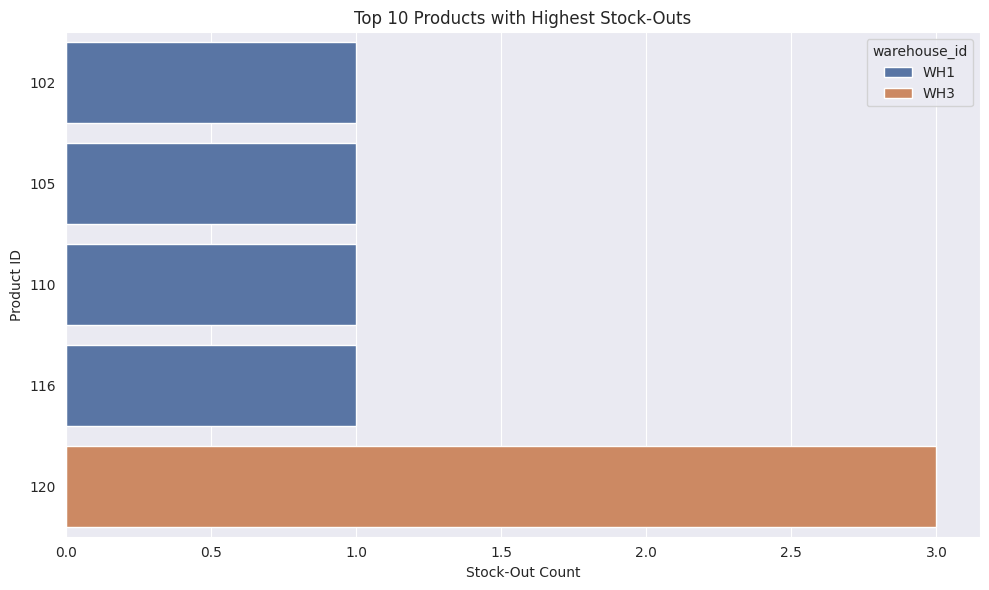

In [51]:
#plotting top 10 top stock out products
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_stockout_products,
    x='stockout_count',
    y='product_id',
    hue='warehouse_id',
    palette='deep',
    orient='h'
)
plt.xlabel('Stock-Out Count')
plt.ylabel('Product ID')
plt.title('Top 10 Products with Highest Stock-Outs')
plt.tight_layout()
plt.show()

Observations:

The stock out events are not concentrated in a specific produc but rather dispersed across a wide range of skus. With 94 unique products and no product having more than 3 stock outs, we can infer that stock outs are operational issue rather than being driven by a specifict product.

###3. Provide Actionable Strategies (based on findings)

📌 Key Observations:

Delivery Status Distribution:

- Most deliveries were successful across all warehouse (72%) and (28%) were delayed.

- Fedex had the highest delay rates in WH1 and WH3.

- UPS  in wh1 had the lowest cancellation rate, and was reliable in the rest of the locations.



Warehouse Performance and Stock -Outs:

- Warehouses share 9.8 % of overall stockouts enven if WH1 (14 orders) WH2 and WH3(11 each one)
- Stock outs were not limited to specific products.

- All warehouses show similar performace, but WH3 slightly outperforms in delivery rate and has lowest cancellation rate (3%) and highest delivered rate (73 %)

Carrier:

- DHL is inconsistent, being the worst in WH1 and WH2, but the best in WH3. FedEx excels in WH2, but unperforms in WH3. UPS is reliable in WH1, with steady performance in other warehouses.




Recommendations:

- Optimize carrier-warehouse paring:
  - Assign FedEx orders to WH2 only, where its delay rates is lowest.
  - Minimize DHL use in WH2, prioritize UPS and FedEX.

- Inventory monitoring and Forecasting:

  - Introduce predictive inventory models.
  - Tag SKU with repeated stock outs and investigate vendor delays.

- Warehouse Accountability Reports:
   - Implement montly reporting of Delivery delay and stock out rates.